# Importing Python Modules and libraries

In [3]:
import os
from collections import Counter
import numpy as np 
import pandas as pd 
from sklearn import preprocessing
from sklearn.preprocessing import PowerTransformer, Normalizer, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
plt.rc("font", size=14)
import seaborn as sns
from scipy import stats
sns.set(color_codes=True)

In [4]:
data1=pd.read_fwf(r"C:\Users\naggar25\Desktop\work.txt",error_bad_lines=False,nrows=100000,delimiter='')

In [5]:
data=data1.copy()
data.columns=np.arange(294)

# Data Extraction from Given File

In [6]:
String_list=data[10].copy()
m=(data.loc[1,10])
type(m)
k=list(m)

In [7]:
Data2=data[71].copy()
Date1=[]
Date2=[]
for num in Data2:
    m=num%100000000
    num=num-m
    k=num/100000000
    Date1.append(k)
    Date2.append(m)
data['Medical Begin Date']=Date1
data['Medical End Date']=Date2


In [8]:
def label_race1 (data):
   if data['PlanD End']=="99999999" or data['PlanD End']=="20190531":
      return 1
   return 0

In [9]:
Data3=data[75].copy()
PBP_id=[]
CMS_contract_id=[]
Sign_date=[]
Election_code=[]
Application_recieve_date=[]
for l in Data3:
    i=list(l)
    Application_recieve_date.append(i[-1:-9])
    Election_code.append(i[-9:-10])
    Sign_date.append(i[-10:])

In [10]:
Birth_Date=[]
Death_Date=[]
Gender=[]
Marital_Status=[]
CMOS_Status=[]
k=0
for l in String_list:
    #print(type(l))
    i=list(l)
    #print(type(i))
    birth=""
    death=""
    gender=""
    marital=""
    cosmo=""
    birth=birth.join(i[0:8])
    death=death.join(i[8:16])
    gender=gender.join(i[16:17])
    marital=marital.join(i[17:18])
    cosmo=cosmo.join(i[18:20])
    Birth_Date.insert(k,birth)
    Death_Date.append(death)
    Gender.append(gender)
    Marital_Status.append(marital)
    CMOS_Status.append(cosmo)
    k=k+1

In [11]:
data['Birth Date']=Birth_Date
data['Death Date']=Death_Date
data['Gender']=Gender
data['Marital Status']=Marital_Status
data['CMOS']=CMOS_Status
data.rename(columns={0:'Transaction Identifier',1:'State Code',2:'GPS Member Number',3:'Alternate Employee ID',5:'HIC No. Eff Date',6:'Medicaid Number',7:'Last Name',8:'First Name',80:'PBP ID',81:
                    'CMS Contract ID',72:'Cancel Reason Code',20:'CMS Geocode',69:'Reciever Medical Coverage Identifier',70:'Reciever medical Coverage(2)',77:'Deleivery Preference',79:'Medical PCP Sequence Number',82:'Signature Date',64:'Billing Cycle',67:'Interest State',68:'Sequence number'},inplace=True)

In [12]:
#Extract columns to form  new dataframe as per need of model.
Data=data[4].copy()
#print(Data)
Mem_SSN=[]
Medicare_no=[]
for l in Data:
    i=list(l)
    mem=""
    medi=""
    mem=mem.join(i[0:9])
    medi=medi.join(i[9:])
    Mem_SSN.append(mem)
    Medicare_no.append(medi)
data['Member SSN Number']=Mem_SSN
data['Medicare Number']=Medicare_no

In [13]:
Data1=data[12].copy()
date1=[]
date2=[]
Status=[]
for i in Data1:
    l=list(i)
    d1=""
    d2=""
    s=""
    d1=d1.join(l[0:8])
    d2=d2.join(l[8:16])
    s=s.join(l[16:17])
    date1.append(d1)
    date2.append(d2)
    Status.append(s)
data['Permanent Address Begin Date']=date1
data['Permanent Address End Date']=date2
data['Foreign Permanent Address Indicator']=Status

In [14]:
Data1=data[19].copy()
State=[]
zip_code=[]
country_code=[]
for i in Data1:
    l=list(i)
    d1=""
    d2=""
    s=""
    d1=d1.join(l[0:2])
    d2=d2.join(l[2:11])
    s=s.join(l[11:14])
    State.append(d1)
    zip_code.append(d2)
    country_code.append(s)
data['State']=State
data['Zip Code']=zip_code
data['County Code']=country_code

In [15]:
data6=data[75].copy()
PBP=[]
CMS=[]
Sign=[]
ele=[]
app=[]
for i in data6:
    j=str(i)
    PBP.append(j[0:11])
    CMS.append(j[11:16])
    Sign.append(j[16:24])
    ele.append(j[24:25])
    app.append(j[25:33])
data['PBP Id']=PBP
data['CMS Contract ID']=CMS
data['Signature Date']=Sign
data['Election Code']=ele
data['Application Form Recieve Date']=app
#print(data['Signature Date'].head())

In [16]:
data7=data[76].copy()
PTI=[]
for j in data7:
        m=list(j)
        PTI.append(m[3:4])
data['Pending Transaction Indicator']=PTI    

In [17]:
data8=data[223].copy()
data9=data[224].copy()
PlanAStart=[]
PlanAEnd=[]
PlanBStart=[]
PlanBEnd=[]
PlanDStart=[]
PlanDEnd=[]
CoverageFlag=[]
Month=[]
Lis=[]
for m in data8:
    l=str(m)
    PlanAStart.append(l[0:8])
    PlanAEnd.append(l[8:16])
    PlanBStart.append(l[16:24])
    PlanBEnd.append(l[24:32])
data['PlanAStart']=PlanAStart 
data['PlanAEnd']=PlanAEnd 
data['PlanBStart']=PlanBStart
data['PlanBEnd']=PlanBEnd 
for k in data9:
        l=str(k)
        PlanDStart.append(l[16:24])
        PlanDEnd.append(l[24:32])
        CoverageFlag.append(l[32:33])
        Month.append(l[33:36])
        Lis.append(l[36:39])
data['PlanD Start Date']=PlanDStart
data['PlanD End']=PlanDEnd
data['Creditable Coverage Flag']=CoverageFlag
data['Number Uncovered Month']=Month
data['LIS Percent']=Lis

In [18]:
data['PlanD Start Date'].unique()

array(['20190101', '20200101', '20180101', '20170101', '20190301',
       '20190201', '20190501', '20150101', '20190401', '20160101',
       '20180301', '20180601', '20180401', '20171201', '20180201',
       '20180801', '20180701', '20160201', '20151101', '20150901',
       '20161101', '20160401', '20150501', '20150701', '20151001',
       '20150201', '20170901', '20181101', '20120701', '20100801',
       '20140301', '20110101', '20110801', '20160601', '20171101',
       '20150801', '20130101', '20101001', '20181001', '20101201',
       '20120101', '20110201', '20110301', '20110501', '20110401',
       '20110601', '20170701', '20110701', '20160301', '20110901',
       '20170601', '20111001', '20180501', '20170501', '20170801',
       '20161201', '20161001', '20150601', '20120201', '20120301',
       '20120501', '20120401', '20120601', '20120801', '20120901',
       '20170301', '20121201', '20140101', '20151201', '20160501',
       '20130201', '20130301', '20181201', '20141101', '201309

In [19]:
#the dataset we are provided is merged with non retain members dataset
#thus,members who are retaining have value for retain 0 and vice versa
g=np.array(np.where(data['PlanD Start Date']=='20110601'))
for i in g:
    print(data.loc[i,'PlanD Start Date']+" "+data.loc[i,'PlanD End'])

5717    20110601 99999999
5750    20110601 99999999
dtype: object


In [20]:
data['Retain_D']=data.apply (lambda data: label_race1(data), axis=1)

In [21]:
data['Retain_D'].unique()
cnt=0
m=len(data.index)
for i in range (0,m):
      if data.loc[i,'Retain_D']:
            cnt=cnt+1
total_retention=cnt
print("Retention Rate from previous year",(cnt/m)*100)

Retention Rate from previous year 88.725


# Exploratory Data Analysis 
refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.
It is a good practice to understand the data first and try to gather as many insights from it. EDA is all about making sense of data in hand,before getting them dirty with it.

In [22]:
data.head()

,Transaction Identifier,State Code,GPS Member Number,Alternate Employee ID,4,HIC No. Eff Date,Medicaid Number,Last Name,First Name,9,...,PlanAStart,PlanAEnd,PlanBStart,PlanBEnd,PlanD Start Date,PlanD End,Creditable Coverage Flag,Number Uncovered Month,LIS Percent,Retain_D
0,D F,000000000000000000ME,801017056,94344653,0001465127Y37E07TR55,20071201,146D512C,EBFD,BDBFCBCEA,D,...,20080501,00000000,20080501,00000000,20190101,99999999,Y,000,000,1
1,D F,000000000000000000TN,801117305,412661271,0063251066JT3CC5ET87,20071201,632B51F06,CBFAD,CDABD,E,...,20040301,00000000,20040301,00000000,20190101,99999999,R,000,100,1
2,D F,000000000000000000FL,801191730,106569859,0000045056K12GC0AG05,20071201,F4E50D5FA,CBDBF,BDFED,D,...,19990901,00000000,19990901,00000000,20190101,99999999,Y,000,000,1
3,D F,000000000000000000NC,801428420,237407951,0047238633FD6HD9XV77,20071201,472F3F863,BDDEAFD,ECCFF,E,...,19950101,00000000,19950101,00000000,20200101,99999999,R,000,000,1
4,D F,000000000000000000MO,801472609,498206653,0007738839GT7WR3FQ45,20071201,77B3E883A,EEBFEF,CBFAEB,NaN,...,19921101,00000000,19921101,00000000,20190101,20190101,Y,000,000,0


In [23]:
data.columns

Index([  'Transaction Identifier',               'State Code',
              'GPS Member Number',    'Alternate Employee ID',
                                4,         'HIC No. Eff Date',
                'Medicaid Number',                'Last Name',
                     'First Name',                          9,
       ...
                     'PlanAStart',                 'PlanAEnd',
                     'PlanBStart',                 'PlanBEnd',
               'PlanD Start Date',                'PlanD End',
       'Creditable Coverage Flag',   'Number Uncovered Month',
                    'LIS Percent',                 'Retain_D'],
      dtype='object', length=323)

In [24]:
data.shape

(20000, 323)

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Columns: 323 entries, Transaction Identifier to Retain_D
dtypes: float64(58), int64(136), object(129)
memory usage: 49.3+ MB


In [26]:
data.describe()

,GPS Member Number,Alternate Employee ID,HIC No. Eff Date,15,CMS Geocode,23,28,31,36,40,...,287,288,289,290,291,292,293,Medical Begin Date,Medical End Date,Retain_D
count,2.000000e+04,2.000000e+04,2.000000e+04,1124.0,20000.000000,743.0,9075.000000,424.0,3923.000000,220.0,...,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,2.000000e+04,2.000000e+04,20000.000000
mean,9.217643e+08,8.878212e+08,2.012298e+07,10.0,26236.870950,10.0,25024.503251,10.0,24326.027785,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.018060e+07,9.099717e+07,0.887250
std,4.703667e+07,1.548941e+08,2.438774e+04,0.0,15247.681208,0.0,15384.159064,0.0,15207.649506,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.772419e+04,2.524911e+07,0.316295
min,6.219300e+05,4.670000e+02,2.007120e+07,10.0,1000.000000,10.0,0.000000,10.0,0.000000,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.010080e+07,2.018063e+07,0.000000
25%,9.068631e+08,9.040199e+08,2.010123e+07,10.0,11370.000000,10.0,11030.000000,10.0,11030.000000,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.018098e+07,1.000000e+08,1.000000
50%,9.313496e+08,9.293798e+08,2.013090e+07,10.0,26940.000000,10.0,23380.000000,10.0,19090.000000,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.019010e+07,1.000000e+08,1.000000
75%,9.553711e+08,9.543795e+08,2.014112e+07,10.0,38250.000000,10.0,36505.000000,10.0,36080.000000,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.019010e+07,1.000000e+08,1.000000
max,9.799992e+08,9.799992e+08,2.019041e+07,10.0,53190.000000,10.0,53190.000000,10.0,53060.000000,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.019050e+07,1.000000e+08,1.000000


In [27]:
#Dropping Unncessary Features(Containing ID's corresponding to unique Member ID)
Drop_col=['HIC No. Eff Date','Sequence number','County Code', 'Medical PCP Sequence Number', 'PBP ID','CMS Contract ID', 'Signature Date','Application Form Recieve Date','Pending Transaction Indicator','Last Name','First Name']
l=[4,9,10,11,12,13,14,15,16,17,18,19,65,66,73,71,74,75,76,78]
k=np.arange(83,294)
j=np.arange(21,64)
data.drop(l, axis=1, inplace=True)
data.drop(k, axis=1, inplace=True)
data.drop(j, axis=1, inplace=True)
data.drop(Drop_col,inplace=True,axis=1)

In [28]:
data['State Code']=data['State Code'].str.strip('0')
data['Transaction Identifier']=data['Transaction Identifier'].str.strip("D")

# Missing Data Values Imputation

In [29]:
print('\nUNIQUE:\n\n', data.nunique())
print('\nMISSING:\n\n', data.isna().mean())


UNIQUE:

 Transaction Identifier                      1
State Code                                 51
GPS Member Number                       20000
Alternate Employee ID                   20000
Medicaid Number                          7644
CMS Geocode                              1700
Billing Cycle                               1
Interest State                             51
Reciever Medical Coverage Identifier       20
Reciever medical Coverage(2)              764
Cancel Reason Code                          1
Deleivery Preference                        2
Medical Begin Date                         91
Medical End Date                           19
Birth Date                               9503
Death Date                                  1
Gender                                      2
Marital Status                              1
CMOS                                        1
Member SSN Number                       19589
Medicare Number                         20000
Permanent Address Begin

In [30]:
data = data.fillna(data.median())#numerical imputation
#data['column_name'].fillna(data['column_name'].value_counts().idxmax(), inplace=True)
threshold = 0.7
#Dropping columns with missing value rate higher than threshold
data = data[data.columns[data.isnull().mean() < threshold]]
#Dropping rows with missing value rate higher than threshold
data = data.loc[data.isnull().mean(axis=1) < threshold]

# Mapping Non-numeric Feature Values in a Dictionary

In [31]:
hey=np.array(np.where(data['Creditable Coverage Flag']=='R' ))
for m in hey:
    data.loc[m,'Creditable Coverage Flag']=1
hey=np.array(np.where(data['Creditable Coverage Flag']=='Y' ))
for m in hey:
    data.loc[m,'Creditable Coverage Flag']=1
hey=np.array(np.where(data['Creditable Coverage Flag']=='N' ))
for m in hey:
    data.loc[m,'Creditable Coverage Flag']=0
hey=np.array(np.where(data['Creditable Coverage Flag']==' ' ))
for m in hey:
    data.loc[m,'Creditable Coverage Flag']=0


In [32]:
def mapping(data,feature):
    featureMap=dict()
    count=0
    for i in sorted(data[feature].unique()):
        featureMap[i]=count
        count=count+1
    data[feature]=data[feature].map(featureMap)
    return featureMap

In [33]:
map_l=mapping(data,'LIS Percent')    

In [35]:
raw=pd.read_csv(r'C:\Users\naggar25\Desktop\Member.csv')   
raw.columns
raw.drop('Unnamed: 0',inplace=True,axis=1)

In [36]:
raw = raw.append({'State Code' : 'DC' ,'State Name':'Derek', 'Cat' : 'state'} , ignore_index=True)

In [37]:
def data_State(data,raw,feature):
    featureMap=dict()
    count=0
    for i in sorted(data[feature].unique()):
        featureMap[i]=count
        count=count+1
    data[feature]=data[feature].map(featureMap)
    raw[feature]=raw[feature].map(featureMap)
    return data

In [38]:
raw.head()
lst1=data['State Code']
lst2=raw['State Code']
data_State(data,raw,'State Code')
data['State Name']=lst1
raw['State att']=lst2

In [39]:
np.array(np.where(data['State Code']==7))
data.loc[1567]
raw.head()
#chacking the raw data

,State Code,State Name,Cat,State att
0,1,Alabama,state,AL
1,0,Alaska,state,AK
2,3,Arizonas,state,AZ
3,2,Arkansas,state,AR
4,4,California,state,CA


# Filling Empty date cell with Present date values

In [40]:
end=['PlanD End','PlanBEnd','PlanAEnd','Permanent Address End Date','Death Date','Medical End Date']
for m in end:
     data[m].fillna('99999999')
#pd.to_datetime(data['PlanAStart'])
start=['PlanD Start Date','PlanBStart','PlanAStart','Permanent Address Begin Date','Birth Date','Medical Begin Date']
for j in start:
     data[j].fillna('00000000')
data['Medical End Date'].head()    
data.loc[0,'PlanD End']='20190716'

In [41]:
uni_set=[]
for j in end:
    uni_set.append(data[j].unique())
uni_set    
flatten =[item for sublist in uni_set for item in sublist]
flatten= list(dict.fromkeys(flatten))
flat=[val for val in flatten if int(str(val)[:2])==99 or int(str(val)[:2])==00]
data['Medical Begin Date']=data['Medical Begin Date'].astype(int).astype(str)
data['Medical End Date']=data['Medical End Date'].astype(int).astype(str)    

In [42]:
from datetime import date
j=str(date.today()).split('-')
s="".join(j)

In [43]:
for y in end:
    for m in range(0,len(data.index)):
        if data.loc[m,y] in flat:
            data.loc[m,y]=str(s)            

# Count number of Years of enrollment of a customer in a particular plan.

In [44]:
diff=[]
cnt=0
sIzE=len(data.index)
for x,y in zip(start,end):
    val=[]
    for m in range(0,sIzE):
        if data.loc[m,x]!='00000000':
            a,b,c=int(data.loc[m,x][:4]),int(data.loc[m,x][4:6]),int(data.loc[m,x][6:8])
            #print(a,b,c)
            d,e,f=int(data.loc[m,y][:4]),int(data.loc[m,y][4:6]),int(data.loc[m,y][6:8])
            #print(d,e,f)
            f_date=date(a,b,c)
            e_date=date(d,e,f)
            day1=(int((date.today() - f_date).days / 365) )
            day2=(int((date.today() - e_date).days / 365) )
            val.append(abs(day2-day1))
        else:
            val.append(np.nan)
            
    diff.append(val) 
    cnt=cnt+1
    print(cnt)

1
2
3
4
5
6


In [45]:
data['Plan D Retain Years']=diff[0]
data['Plan B Retain Years']=diff[1]
data['Plan A Retain Years']=diff[2]
data['Permanent Address Retain Years']=diff[3]
data['Medical Coverage Years']=diff[5]

In [46]:
to_drop=['PlanD Start Date','PlanD End','PlanBStart','PlanBEnd','PlanAStart','PlanAEnd','Permanent Address Begin Date','Permanent Address End Date']
data.drop(to_drop,inplace=True,axis=1)

In [47]:
data['Number Uncovered Month'].astype(str).astype(int)
data['LIS Percent'].astype(str).astype(int)
print("")

In [48]:
for c in [column for column in data.columns if data[column].dtype==object]:
    data[c].astype(str)

# Age calculation from BirthDate

In [49]:
from datetime import date
m=str(data['Birth Date'].iloc[5])
year=int(m[0:4])
month=int(m[4:6])
day=int(m[6:8])
date(year,month,day)
#data['Age']=int((date.today() - data['Birth Date']).days / 365) 

datetime.date(1944, 3, 13)

In [50]:
age=[]
for i in data['Birth Date']:
    m=str(i)
    year=int(m[0:4])
    month=int(m[4:6])
    day=int(m[6:8])
    j=date(year,month,day)
    age.append(int((date.today() - j).days / 365) )
    

In [51]:
data['Age']=age

Percent of missing "Age" records is 0.00 %


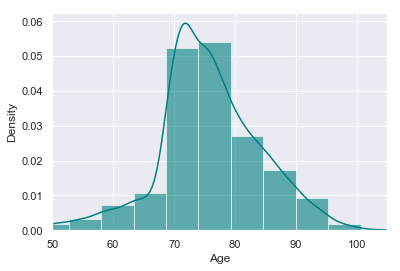

The mean of "Age" is 75.41
The median of "Age" is 75.00


In [52]:
print('Percent of missing "Age" records is {:.2f} %'.format((data.Age.isna().mean())*100))

ax = data["Age"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
data["Age"].plot(kind='density', color='teal')
ax.set(xlabel='Age')
plt.xlim(50,105)
plt.show()

# mean age
print('The mean of "Age" is %.2f' %(data["Age"].mean(skipna=True)))
# median age
print('The median of "Age" is %.2f' %(data["Age"].median(skipna=True)))

In [53]:
to_drop=['Deleivery Preference','CMS Geocode', 'Medical Begin Date',
       'Medical End Date', 'Death Date','Transaction Identifier','Cancel Reason Code','Billing Cycle','Alternate Employee ID','CMOS','Birth Date','Interest State','Member SSN Number','GPS Member Number','Reciever Medical Coverage Identifier', 'Reciever medical Coverage(2)','Medicare Number','Medicaid Number','Marital Status','Foreign Permanent Address Indicator','State','PBP Id','Election Code']
data.drop(to_drop,inplace=True,axis=1)

In [54]:
data.isnull().mean()
data = data.fillna(0)

In [55]:
from sklearn.preprocessing import LabelEncoder 
number=LabelEncoder()
for c in data.columns:
    if(data[c].dtypes==object):
        data[c]=number.fit_transform(data[c].astype(str))

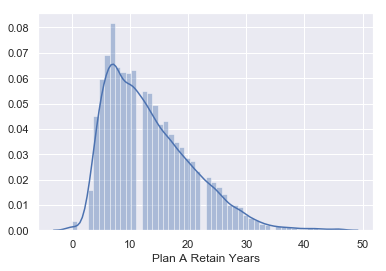

In [56]:
sns.distplot(data['Plan A Retain Years'])

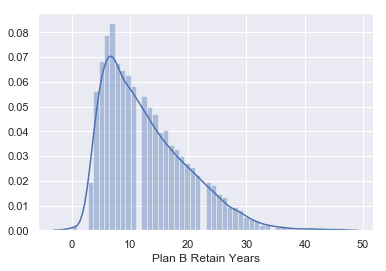

In [57]:
sns.distplot(data['Plan B Retain Years'])

In [58]:
#sns.set(style='ticks',color_codes=True)
#graph=sns.pairplot(data)

# Finding Co-Related Features

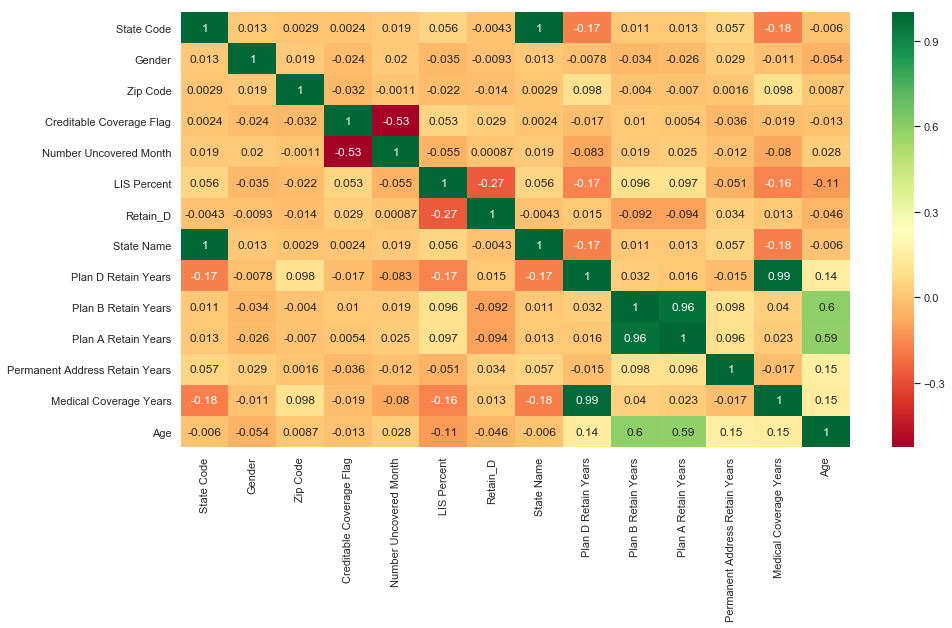

In [59]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(),annot=True,cmap="RdYlGn")

In [60]:
corr_matrix = data.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.85)]

print(to_drop)

data.drop(to_drop,inplace=True,axis=1)

['State Name', 'Plan A Retain Years', 'Medical Coverage Years']


In [61]:
m=np.transpose(np.array(np.where(data['Creditable Coverage Flag']==1)))
move=len(m)
size=len(data.index)
print("% of retention of members with Creditable Coverage Flag",(move/size)*100)

% of retention of members with Creditable Coverage Flag 96.58


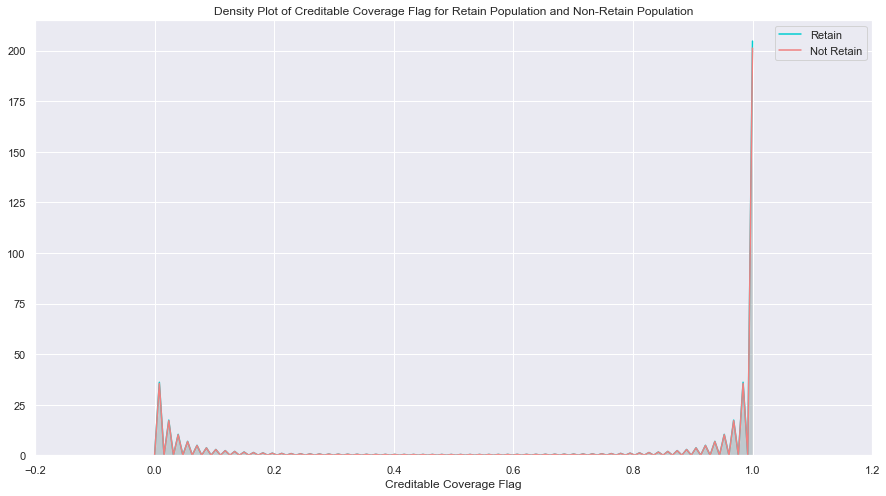

In [62]:
plt.figure(figsize=(15,8))
#Flag indicates if mbr previously had creditable RX coverage  
ax = sns.kdeplot(data["Creditable Coverage Flag"][data.Retain_D == 1], color="darkturquoise", shade=True)
sns.kdeplot(data["Creditable Coverage Flag"][data.Retain_D == 0], color="lightcoral", shade=True)
plt.legend(['Retain', 'Not Retain'])
plt.title('Density Plot of Creditable Coverage Flag for Retain Population and Non-Retain Population')
ax.set(xlabel='Creditable Coverage Flag')
plt.xlim(-0.2,1.2)
plt.show()

# Feature Engineering Process
1.Preparing the proper input dataset, compatible with the machine learning algorithm requirements.
2.Improving the performance of machine learning models.

In [63]:
data.to_csv('output_1',sep='\t', encoding='utf-8')

In [64]:
def label_race2 (data,feature):
    for m in feature:
        k=0
        for Str in data[m]:
            Str=Str[::-1]
            data.iloc[k,m]=Str
            k=k+1
            
#code use to reverse the string for the fetched columns.            

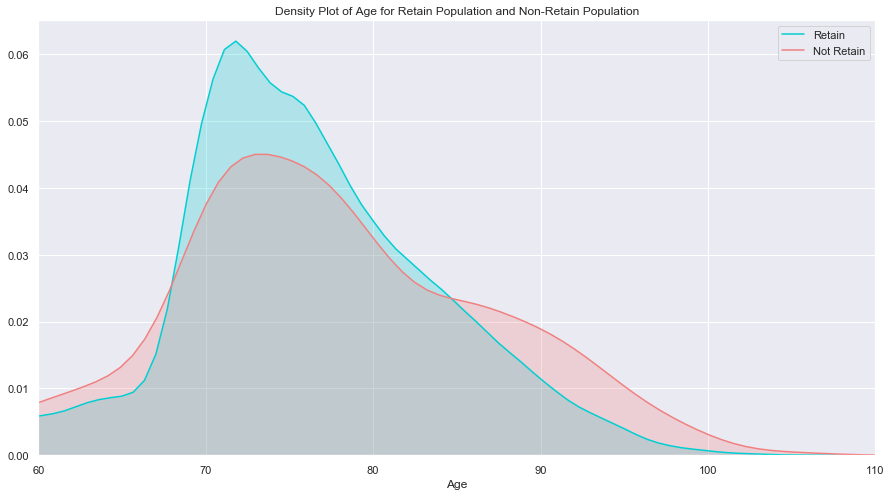

In [65]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(data["Age"][data.Retain_D == 1], color="darkturquoise", shade=True)
sns.kdeplot(data["Age"][data.Retain_D == 0], color="lightcoral", shade=True)
plt.legend(['Retain', 'Not Retain'])
plt.title('Density Plot of Age for Retain Population and Non-Retain Population')
ax.set(xlabel='Age')
plt.xlim(60,110)
plt.show()

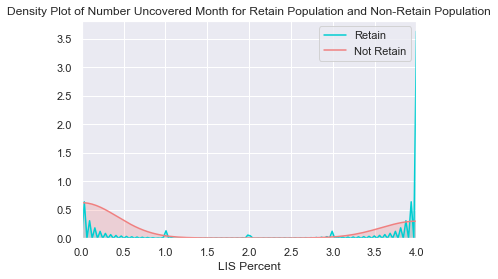

In [66]:
plt.figure(figsize=(6,4))
ax = sns.kdeplot(data['LIS Percent'][data.Retain_D == 1], color="darkturquoise", shade=True)
sns.kdeplot(data['LIS Percent'][data.Retain_D == 0], color="lightcoral", shade=True)
plt.legend(['Retain', 'Not Retain'])
plt.title('Density Plot of Number Uncovered Month for Retain Population and Non-Retain Population')
ax.set(xlabel='LIS Percent')
plt.xlim(0,4)
plt.show()

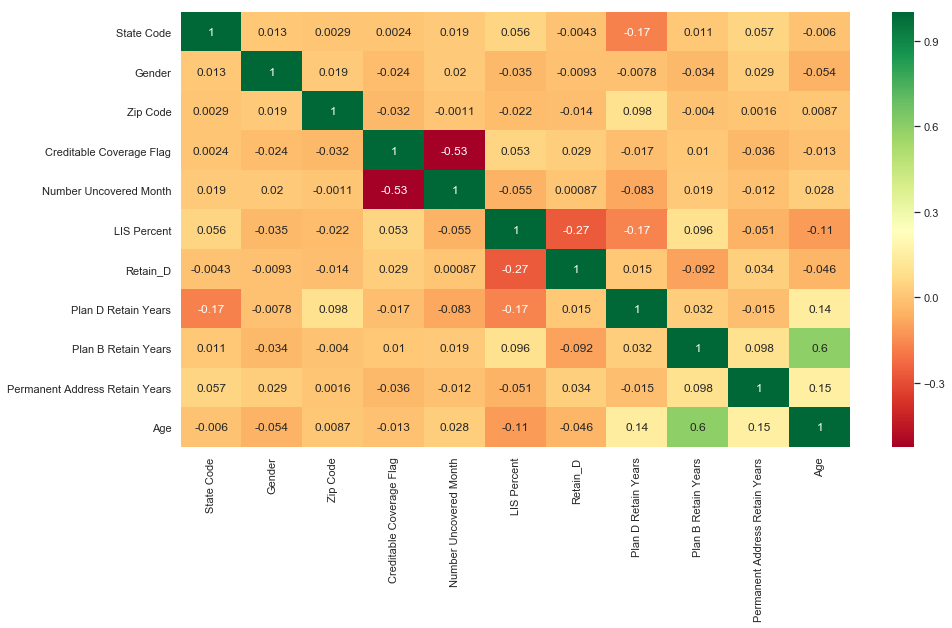

In [67]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(),annot=True,cmap="RdYlGn")

In [68]:
m=data['Retain_D'].copy()
data.drop(['Retain_D'],inplace=True,axis=1)
data['Retain_D']=m

# Model Training

In [69]:
X_train,X_test,y_train,y_test=train_test_split(data.iloc[:,0:-1],data['Retain_D'],test_size=0.4, random_state=82)

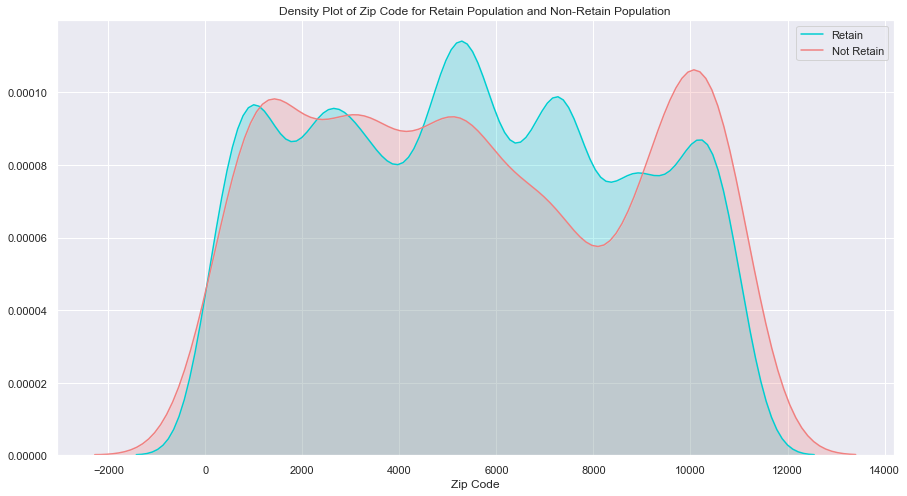

In [70]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(data["Zip Code"][data.Retain_D == 1], color="darkturquoise", shade=True)
sns.kdeplot(data["Zip Code"][data.Retain_D == 0], color="lightcoral", shade=True)
plt.legend(['Retain', 'Not Retain'])
plt.title('Density Plot of Zip Code for Retain Population and Non-Retain Population')
ax.set(xlabel='Zip Code')

plt.show()

# Logistic Regression

Train Accuracy: 	88.467 %
Validation Accuracy: 	88.900 %
Coefficients: 
 [[ 4.97405254e-03 -2.39177360e-01 -5.54288200e-06  1.54369812e+00
   1.92242391e-02 -4.60600020e-01 -4.16704276e-02 -3.02551189e-02
   5.51111548e-02 -6.40293244e-04]]
Mean squared error: 0.11
Variance score: -0.13


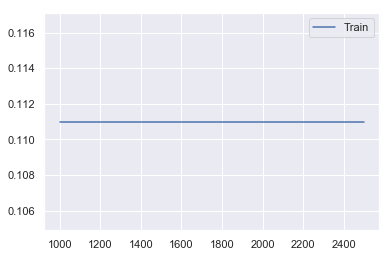

In [71]:
from sklearn import preprocessing
from sklearn.preprocessing import PowerTransformer, Normalizer, StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,mean_squared_error,r2_score
accTrain=[]
accTest=[]
rems=[]
itr=np.arange(1000,3000,500)
for i in itr:
    lg=LogisticRegression(solver='lbfgs',max_iter=i)
    lg.fit(X_train,y_train)
    y_pred=lg.predict(X_test)
    tr_acc = accuracy_score(lg.predict(X_train), y_train)
    te_acc = accuracy_score(y_pred, y_test) 
    accTrain.append(tr_acc*100)
    accTest.append(te_acc*100)
    rems.append(mean_squared_error(y_test,y_pred))
sns.lineplot(itr, rems, label='Train')  
print('Train Accuracy: \t{:.3f} %\nValidation Accuracy: \t{:.3f} %'.format(tr_acc*100, te_acc*100))
print('Coefficients: \n',lg.coef_)
# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(y_test,y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test,y_pred))

# RandomForestClassifier

In [72]:
names=data.columns
#sklearn.ensemble.RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
cf1=RandomForestClassifier(n_estimators=200,criterion='entropy', random_state=np.random)
cf1.fit(X_train,y_train)
y_pred=cf1.predict(X_test)
tr_acc1 = accuracy_score(cf1.predict(X_train), y_train)
te_acc1 = accuracy_score(y_pred, y_test)
print('Train Accuracy: \t{:.3f} %\nValidation Accuracy: \t{:.3f} %'.format(tr_acc1*100, te_acc1*100))
print(cf1.score(X_train,y_train))

Train Accuracy: 	99.983 %
Validation Accuracy: 	89.087 %
0.9998333333333334


In [73]:
print("Decision Path",cf1.decision_path(X_train))
arr=cf1.feature_importances_
j=np.amax(arr)
result = np.where(arr == np.amax(arr))
#print (sorted(zip(map(lambda x: round(x, 4), cf1.feature_importances_), names),reverse=True))

Decision Path (<12000x633146 sparse matrix of type '<class 'numpy.int64'>'
	with 41517574 stored elements in Compressed Sparse Row format>, array([     0,   3083,   6142,   9419,  12478,  15609,  18806,  22021,
        25154,  28255,  31360,  34477,  37592,  40819,  43964,  47109,
        50322,  53637,  56800,  59879,  63064,  66197,  69360,  72559,
        75588,  78773,  81860,  84845,  87964,  91113,  94350,  97465,
       100764, 103825, 106916, 110025, 113082, 116267, 119578, 122683,
       126006, 129245, 132442, 135599, 138810, 142059, 145212, 148333,
       151470, 154731, 157870, 161125, 164260, 167425, 170564, 173729,
       176732, 179783, 182844, 185885, 189124, 192261, 195402, 198523,
       201650, 204727, 207814, 211005, 214170, 217501, 220698, 223855,
       227052, 230187, 233338, 236541, 239656, 242847, 246018, 249213,
       252358, 255483, 258716, 261887, 265004, 268071, 271218, 274451,
       277610, 280853, 284124, 287323, 290508, 293777, 297178, 300309,
       3

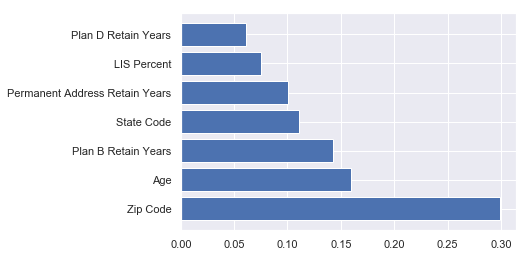

In [74]:
List=(sorted(zip(map(lambda x: round(x, 4), cf1.feature_importances_), names),reverse=True))
x_axis=[]
y_axis=[]
m=0
for y,x in List:
    x_axis.append(x)
    y_axis.append(y)
    m=m+1
    if(m==7):
        break
y_pos = np.arange(len(x_axis)) 
plt.barh(y_pos, y_axis) 
# Create names on the y-axis
plt.yticks(y_pos, x_axis)
# Show graphic
plt.show()   

# Standardistaion

In [75]:
data.describe()


,State Code,Gender,Zip Code,Creditable Coverage Flag,Number Uncovered Month,LIS Percent,Plan D Retain Years,Plan B Retain Years,Permanent Address Retain Years,Age,Retain_D
count,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000
mean,24.233450,0.422650,5459.61620,0.965800,1.252650,0.407800,0.916200,12.75640,3.943150,75.406350,0.887250
std,14.506777,0.493993,3197.02357,0.181747,7.768876,1.196106,1.733242,7.19309,2.822289,9.247292,0.316295
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,26.000000,0.000000
25%,10.000000,0.000000,2686.75000,1.000000,0.000000,0.000000,0.000000,7.00000,2.000000,71.000000,1.000000
50%,24.000000,0.000000,5362.50000,1.000000,0.000000,0.000000,0.000000,11.00000,4.000000,75.000000,1.000000
75%,37.000000,1.000000,8102.25000,1.000000,0.000000,0.000000,0.000000,17.00000,5.000000,81.000000,1.000000
max,50.000000,1.000000,11126.00000,1.000000,98.000000,4.000000,8.000000,46.00000,11.000000,106.000000,1.000000


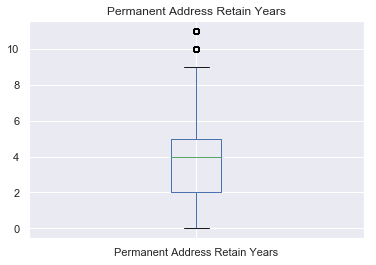

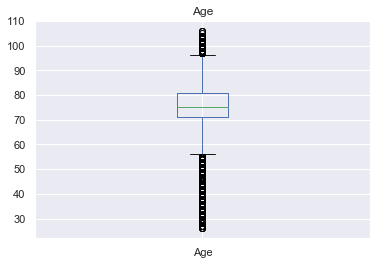

In [76]:
for col in ['Permanent Address Retain Years','Age']:
    display(data[col].plot(kind = 'box', title=col))
    plt.show()

In [77]:
pt = PowerTransformer(method = 'yeo-johnson', standardize=True)
for i in list(set(data.columns)-set(['Retain_D','Number Uncovered Month'])):
    X_train[i] = pt.fit_transform(X_train[[i]].values)
    X_test[i] = pt.transform(X_test[[i]].values)

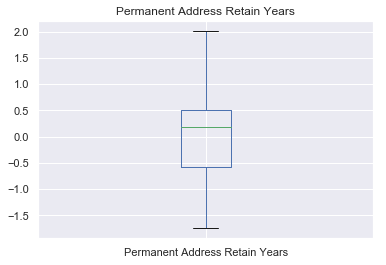

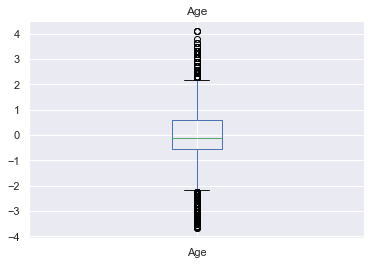

In [78]:
for col in ['Permanent Address Retain Years','Age']:
    display(X_train[col].plot(kind = 'box', title=col))
    plt.show()

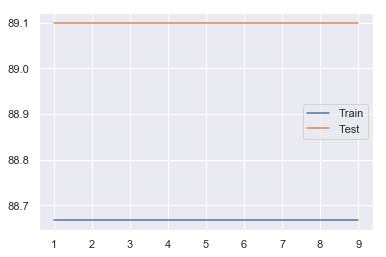

In [79]:
results = []

Cs = np.arange(1, 10, 1)
for C in Cs:
    lg = LogisticRegression(solver='lbfgs', C=C)
    lg.fit(X_train, y_train)
    y_pred = lg.predict(X_test)

    tr_acc = accuracy_score(lg.predict(X_train), y_train) * 100
    te_acc = accuracy_score(y_pred, y_test) * 100

    results.append((tr_acc, te_acc))
    
results = np.array(results)
sns.lineplot(Cs, results[:,0], label='Train')
sns.lineplot(Cs, results[:,1], label='Test')

In [80]:
lg = LogisticRegression(solver='lbfgs')
lg.fit(X_train, y_train)
y_pred = lg.predict(X_test)

tr_acc = accuracy_score(lg.predict(X_train), y_train)
te_acc = accuracy_score(y_pred, y_test)

print('Train Accuracy: \t{:.3f} %\nValidation Accuracy: \t{:.3f} %'.format(tr_acc*100, te_acc*100))

Train Accuracy: 	88.667 %
Validation Accuracy: 	89.100 %


# State Wise Member Retention Percentage

In [81]:
#List= list(np.arange(1,50,1))
List= data['State Code'].unique()
result_cnt={}
result_per={}
#print(result)
for j in List:
    result_cnt[j]=0
    result_per[j]=0
#print(result)    

In [82]:
m=len(data.index)
for i in range(m):
    if(data.loc[i]['Retain_D']):
         result_cnt[data.loc[i]['State Code']]=result_cnt[data.loc[i]['State Code']]+1; 
    result_per[data.loc[i]['State Code']]=result_per[data.loc[i]['State Code']]+1;  
#len(result_cnt  )  


In [83]:
sorted(data['State Code'].unique())

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50]

In [84]:
list23=result_cnt.items()#dictionary of number of members to retain the plan in each state
enrolled1=pd.DataFrame(list23)
enrolled1=enrolled1.sort_values([0],ascending=True, inplace=False, kind='quicksort')
list231=result_per.items()#dictionary of total number of members enrolled in each state
enrolled2=pd.DataFrame(list231)
enrolled2=enrolled2.sort_values([0],ascending=True, inplace=False, kind='quicksort')
raw=raw.sort_values(['State Code'],ascending=True, inplace=False, kind='quicksort')

In [85]:
l1=[]
l2=[]
move=len(raw.index)
for i in range(0,move):
    l1.append(enrolled1.loc[i,1])
    l2.append(enrolled2.loc[i,1])
raw['Number of members retain']=l1
raw['Total number of enrollment']=l2

In [86]:
List1=result_cnt.items()#list of tuples
List2=result_per.items()
print(result_cnt[50])
print(result_per[50])
m=len(data.index)
for k in result_cnt:
    result_cnt[k]=(result_cnt[k]/result_per[k])*100;
    
List1=sorted(List1)

16
16


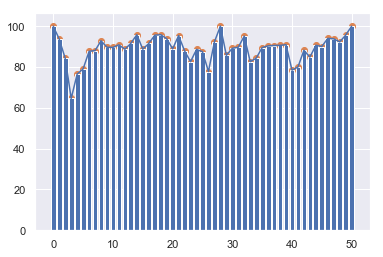

[(0, 100.0), (1, 93.64161849710982), (2, 84.21052631578947), (3, 64.58333333333334), (4, 76.52173913043478), (5, 79.06976744186046), (6, 87.67772511848341), (7, 88.0), (8, 92.85714285714286), (9, 89.6398069067954), (10, 89.58990536277602), (11, 90.81632653061224), (12, 88.67924528301887), (13, 91.6030534351145), (14, 95.82289055973267), (15, 88.71527777777779), (16, 91.52542372881356), (17, 95.54794520547945), (18, 95.83333333333334), (19, 93.85245901639344), (20, 88.88888888888889), (21, 95.40229885057471), (22, 87.87878787878788), (23, 82.6086956521739), (24, 88.58895705521472), (25, 87.5), (26, 77.77777777777779), (27, 92.28316326530613), (28, 100.0), (29, 85.71428571428571), (30, 89.1566265060241), (31, 89.67828418230563), (32, 95.1219512195122), (33, 82.6086956521739), (34, 84.30989583333334), (35, 89.49416342412452), (36, 90.32258064516128), (37, 90.52631578947368), (38, 90.57377049180327), (39, 90.9090909090909), (40, 78.44611528822055), (41, 80.0), (42, 88.16901408450704), (43,

In [87]:
x,y=zip(*List1)
df=pd.DataFrame(List1)
plt.plot(x,y)
plt.bar(x,y)
plt.scatter(x,y)
plt.show()
df.columns=['State_code','Retention_Rate']
df.tail()
print(List1)

In [88]:
raw.head()

,State Code,State Name,Cat,State att,Number of members retain,Total number of enrollment
1,0,Alaska,state,AK,83,87
0,1,Alabama,state,AL,313,355
3,2,Arkansas,state,AR,2414,2693
2,3,Arizonas,state,AZ,1447,1568
4,4,California,state,CA,722,815


In [89]:
lst1#containg State code of data dataframe
df.sort_values('State_code')
df['State_code'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50],
      dtype=int64)

In [90]:
A=set(raw['State Code'])
B=set(df['State_code'])
print(A.difference(B))#to check if any state code left under observation
raw.sort_values(by='State Code')

set()


,State Code,State Name,Cat,State att,Number of members retain,Total number of enrollment
1,0,Alaska,state,AK,83,87
0,1,Alabama,state,AL,313,355
3,2,Arkansas,state,AR,2414,2693
2,3,Arizonas,state,AZ,1447,1568
4,4,California,state,CA,722,815
5,5,Colorado,state,CO,324,346
6,6,Connecticut,state,CT,1295,1536
50,7,Derek,state,DC,89,98
7,8,Delaware,state,DE,1015,1100
8,9,Florida,state,FL,1704,1902


In [91]:
li=[]
for i in range(0,len(df.index)):
    li.append(df.loc[i,'Retention_Rate'])  
raw['Retention_Rate']=li    

In [97]:
raw.to_csv(r"C:\Users\naggar25\Desktop\Mem1.csv")
raw.sample(20)

,State Code,State Name,Cat,State att,Number of members retain,Total number of enrollment,Retention_Rate
7,8,Delaware,state,DE,1015,1100,92.857143
23,25,Mississippi,state,MS,54,59,87.500000
41,42,Tennessee,state,TN,4,5,88.169014
50,7,Derek,state,DC,89,98,88.000000
20,19,Massachusetts,state,MA,217,336,93.852459
6,6,Connecticut,state,CT,1295,1536,87.677725
45,45,Virginia,state,VA,22,25,90.030211
1,0,Alaska,state,AK,83,87,100.000000
33,28,North Dakota,state,ND,298,331,100.000000
28,30,New Hampshire,state,NH,221,244,89.156627


95.82289055973267


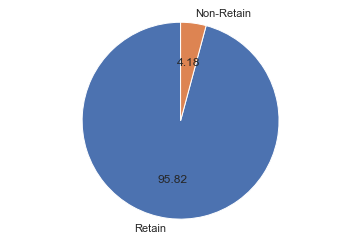

In [98]:
import matplotlib.pyplot as plotter
#explodeTuple = (0.1,0.2)
pieLabels=['Retain','Non-Retain']
figureObject, axesObject = plotter.subplots()
m=df.loc[14]['Retention_Rate']
print(m)
axesObject.pie([m,100-m],labels=pieLabels,autopct='%1.2f',startangle=90)
# Aspect ratio - equal means pie is a circle
axesObject.axis('equal')
plotter.show()

In [99]:
data.to_csv('Out1', sep='\t', encoding='utf-8')

In [100]:
import plotly
#plotly.__version__
import plotly.plotly as py
from plotly.offline import *
import plotly.graph_objs as go
import pandas as pd

df = pd.read_csv(r"C:\Users\naggar25\Desktop\Member1.csv")
df.head()
df.drop('Unnamed: 0',inplace=True,axis=1)

In [101]:
raw.head()

,State Code,State Name,Cat,State att,Number of members retain,Total number of enrollment,Retention_Rate
1,0,Alaska,state,AK,83,87,100.000000
0,1,Alabama,state,AL,313,355,93.641618
3,2,Arkansas,state,AR,2414,2693,84.210526
2,3,Arizonas,state,AZ,1447,1568,64.583333
4,4,California,state,CA,722,815,76.521739


In [102]:
for col in raw.columns:
    raw[col] = raw[col].astype(str)

raw['text'] = raw['State Name']

In [103]:
datag = [go.Choropleth(
    colorscale = 'Reds',
    autocolorscale = False,
    locations = raw['State att'],
    z = raw['Retention_Rate'].astype(float),
    locationmode = 'USA-states',
    text=raw['text'], # hover text
    marker = go.choropleth.Marker(
        line = go.choropleth.marker.Line(
            color = 'rgb(255,255,255)',
            width = 2
        )),
    colorbar = go.choropleth.ColorBar(
        title = "Retention Percentage")
)]

In [104]:
layout = go.Layout(
    title = go.layout.Title(
        text = '2019 Prediction for Member Retention by State<br>(Hover for breakdown)'
    ),
    geo = go.layout.Geo(
        scope = 'usa',
        projection = go.layout.geo.Projection(type = 'albers usa'),
        showlakes = True,
        lakecolor = 'rgb(255, 255, 255)'),
)

In [105]:
fig = go.Figure(data = datag, layout = layout)
#fig.show()
plotly.offline.plot(fig, filename='InternFinalModel.html')

'InternFinalModel.html'

In [106]:
raw.head()

,State Code,State Name,Cat,State att,Number of members retain,Total number of enrollment,Retention_Rate,text
1,0,Alaska,state,AK,83,87,100.0,Alaska
0,1,Alabama,state,AL,313,355,93.64161849710982,Alabama
3,2,Arkansas,state,AR,2414,2693,84.21052631578947,Arkansas
2,3,Arizonas,state,AZ,1447,1568,64.58333333333334,Arizonas
4,4,California,state,CA,722,815,76.52173913043478,California
